http://www.iam.fmph.uniba.sk/institute/jurca/qrm/Chapter5.pdf

Gini Coefficient: 0.6


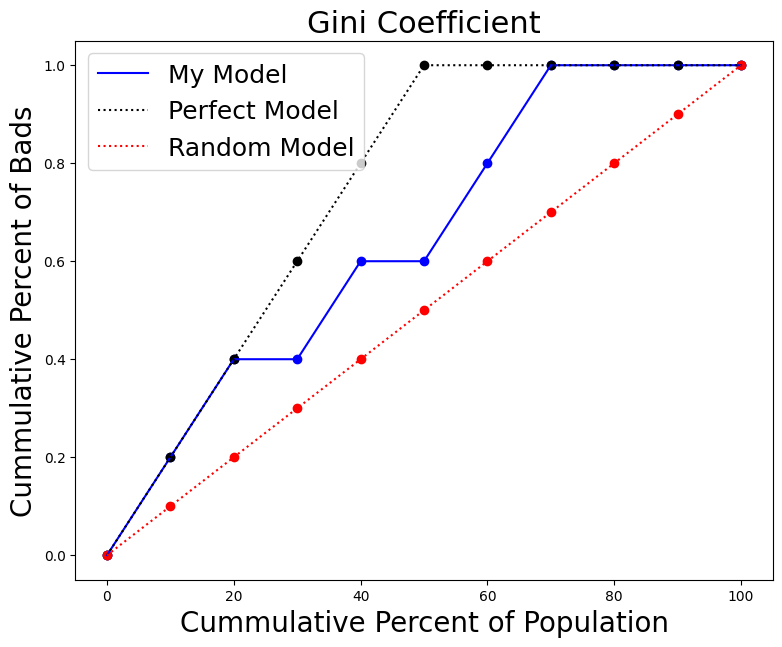

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def gini(y_pred, y_true):

    # casting
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)

    # obtain index for sorting according to y_scores
    sorted_idx = np.argsort(y_pred)[::-1]

    # created sorted arrays BY SCORES
    sorted_pred = y_pred[sorted_idx]
    sorted_true = y_true[sorted_idx]

    # calculate lorenz function for different Ks for:
    # our discriminator
    f_k = np.concatenate(([0], (sorted_true == 1).cumsum() / sorted_true.sum()))
    # theoretical perfect model
    f_optimal = np.concatenate(
        ([0], (np.sort(y_true)[::-1]).cumsum() / sorted_true.sum())
    )
    # theoretical random
    f_rand = np.linspace(0, 1, len(f_k))

    # calculate gini
    gini = np.sum(f_k - f_rand)
    gini_optimal = np.sum(f_optimal - f_rand)

    return gini / gini_optimal

def plot_gini(y_pred, y_true):
    # casting
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)

    # obtain index for sorting according to y_scores
    sorted_idx = np.argsort(y_pred)[::-1]

    # created sorted arrays BY SCORES
    sorted_pred = y_pred[sorted_idx]
    sorted_true = y_true[sorted_idx]

    # calculate lorenz function for different Ks for:
    # our discriminator
    f_k = np.concatenate(([0], (sorted_true == 1).cumsum() / sorted_true.sum()))
    # theoretical perfect model
    f_optimal = np.concatenate(([0], (np.sort(y_true)[::-1]).cumsum() / sorted_true.sum()))
    # theoretical random
    f_rand = np.linspace(0, 1, len(f_k))

    plt.figure(figsize=(9,7))
    xs = np.linspace(0, 100, 11)
    plt.scatter(xs, f_k, color='blue')
    plt.plot(xs, f_k, label='My Model', color='blue')
    plt.scatter(xs, f_optimal, color='black')
    plt.plot(xs, f_optimal, color='black', linestyle='dotted', label='Perfect Model')
    plt.scatter(xs, f_rand, color='red')
    plt.plot(xs, f_rand, color='red', linestyle='dotted', label='Random Model')

    plt.xlim(- 5,105 )
    plt.ylim(-0.05,1.05)

    plt.title('Gini Coefficient', fontsize=22)
    plt.xlabel('Cummulative Percent of Population', fontsize=20)
    plt.ylabel('Cummulative Percent of Bads', fontsize=20)
    plt.legend(fontsize=18, loc=2)
    plt.show()



y_pred = [0.29, 0.36, 0.81, 0.31, 0.68, 0.82, 0.90, 0.13, 0.86, 0.97]
y_true = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]

print('Gini Coefficient:', gini(y_pred, y_true))
plot_gini(y_pred, y_true)

In [ ]:
import random


In [4]:
def plot_roc_curve(y_true, y_score):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc

    # Compute FPR, TPR, and thresholds
    fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
    # Compute AUC
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label="ROC curve (AUC = %0.5f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "r--")  # Plotting the diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()


def compute_auc_gini(y_true, y_score):
    from sklearn.metrics import roc_auc_score

    auc = roc_auc_score(y_true=y_true, y_score=y_score)
    gini = 2 * auc - 1
    return auc, gini

In [25]:
print(compute_auc_gini(y_true, y_pred))
print()

(0.8, 0.6000000000000001)



In [26]:
import numpy as np


def gini(actual, pred):
    assert len(actual) == len(pred)
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.0
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)


gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini = gini_normalized(actual, predictions)
print(
    "Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f"
    % (gini_predictions, gini_max, ngini)
)

Gini: 0.150, Max. Gini: 0.250, Normalized Gini: 0.600


In [21]:
def gini(actual, pred, cmpcol=0, sortcol=1):
    assert len(actual) == len(pred)
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.0
    return giniSum / len(actual)


def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)


def test_gini():
    def fequ(a, b):
        return abs(a - b) < 1e-6

    def T(a, p, g, n):
        assert fequ(gini(a, p), g)
        assert fequ(gini_normalized(a, p), n)

    T([1, 2, 3], [10, 20, 30], 0.111111, 1)
    T([1, 2, 3], [30, 20, 10], -0.111111, -1)
    T([1, 2, 3], [0, 0, 0], -0.111111, -1)
    T([3, 2, 1], [0, 0, 0], 0.111111, 1)
    T([1, 2, 4, 3], [0, 0, 0, 0], -0.1, -0.8)
    T([2, 1, 4, 3], [0, 0, 2, 1], 0.125, 1)
    T([0, 20, 40, 0, 10], [40, 40, 10, 5, 5], 0, 0)
    T([40, 0, 20, 0, 10], [1000000, 40, 40, 5, 5], 0.171428, 0.6)
    T([40, 20, 10, 0, 0], [40, 20, 10, 0, 0], 0.285714, 1)
    T([1, 1, 0, 1], [0.86, 0.26, 0.52, 0.32], -0.041666, -0.333333)

In [29]:
y_pred = [0.29, 0.36, 0.81, 0.31, 0.68, 0.82, 0.90, 0.13, 0.86, 0.97]

y_true = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]

pred = y_pred
actual = y_true
all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=float)
all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
print(all)
totalLosses = all[:, 0].sum()
print(totalLosses)
giniSum = all[:, 0].cumsum().sum() / totalLosses
print(giniSum)

[[1.   0.97 9.  ]
 [1.   0.9  6.  ]
 [0.   0.86 8.  ]
 [1.   0.82 5.  ]
 [0.   0.81 2.  ]
 [1.   0.68 4.  ]
 [1.   0.36 1.  ]
 [0.   0.31 3.  ]
 [0.   0.29 0.  ]
 [0.   0.13 7.  ]]
5.0
7.0


In [33]:
all[:, 0].cumsum().sum() / totalLosses

7.0

In [34]:
# giniSum -= (len(actual) + 1) / 2.
giniSum = giniSum - len(actual) + 1

7.0

Gini Coefficient: 0.6


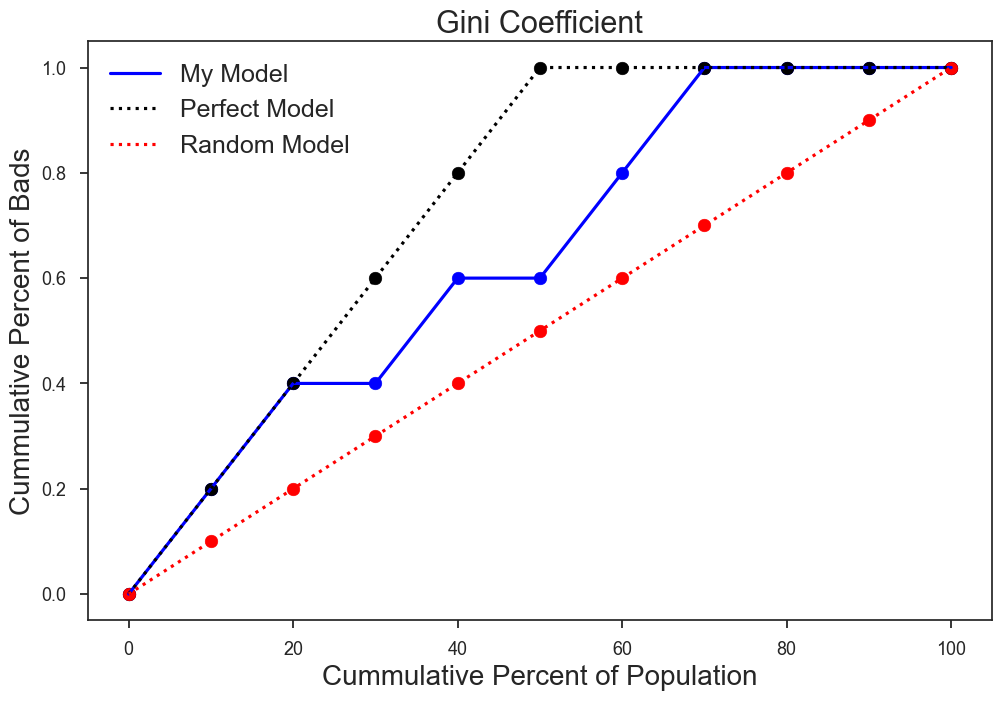

In [165]:
y_pred = [0.29, 0.36, 0.81, 0.31, 0.68, 0.82, 0.90, 0.13, 0.86, 0.97]
y_true = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]


# casting
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# obtain index for sorting according to y_scores
sorted_idx = np.argsort(y_pred)[::-1]

# created sorted arrays BY SCORES
sorted_pred = y_pred[sorted_idx]
sorted_true = y_true[sorted_idx]

# calculate lorenz function for different Ks for:
# our discriminator
f_k = np.concatenate(([0], (sorted_true == 1).cumsum() / sorted_true.sum()))
# theoretical perfect model
f_optimal = np.concatenate(([0], (np.sort(y_true)[::-1]).cumsum() / sorted_true.sum()))
# theoretical random
f_rand = np.linspace(0, 1, len(f_k))

print(f_k)
print(f_optimal)
print(f_rand)

[0.  0.2 0.4 0.4 0.6 0.6 0.8 1.  1.  1.  1. ]
[0.  0.2 0.4 0.6 0.8 1.  1.  1.  1.  1.  1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


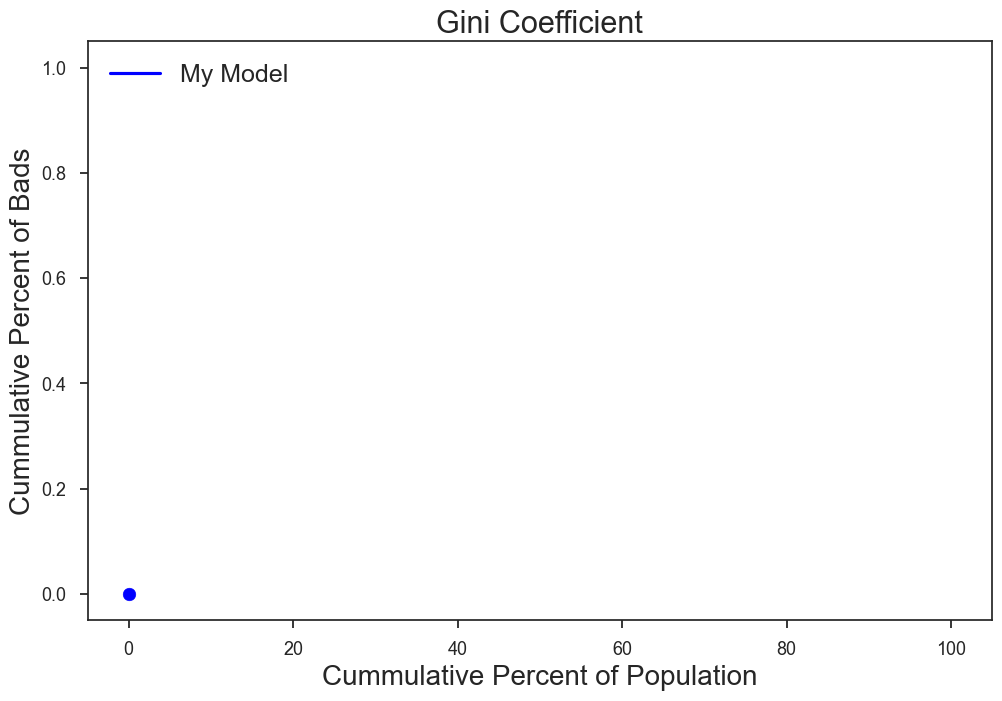

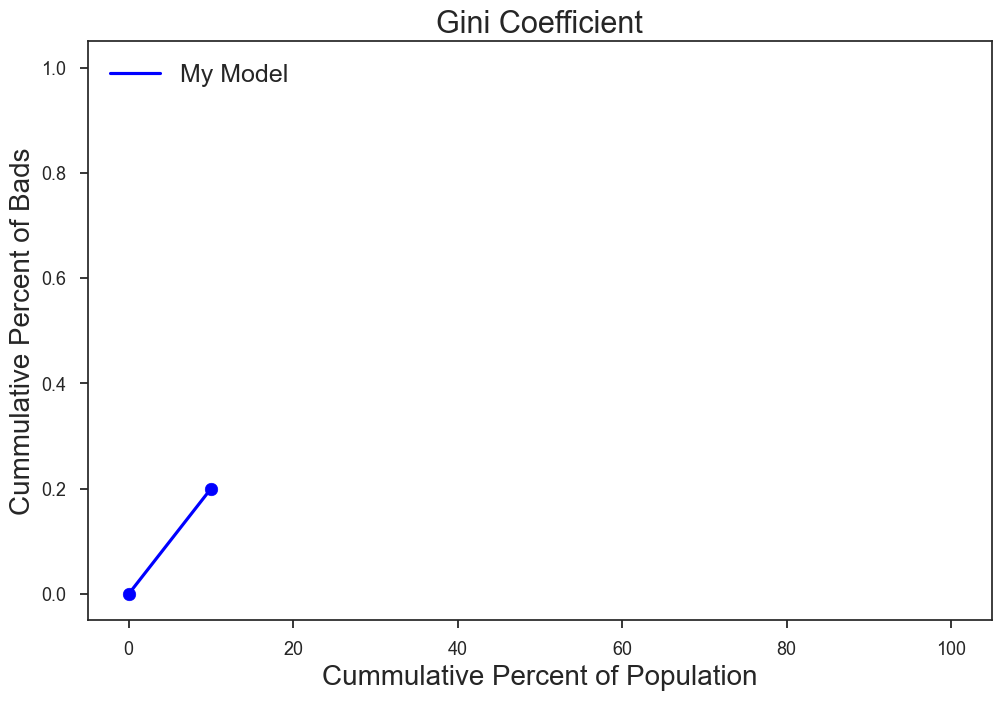

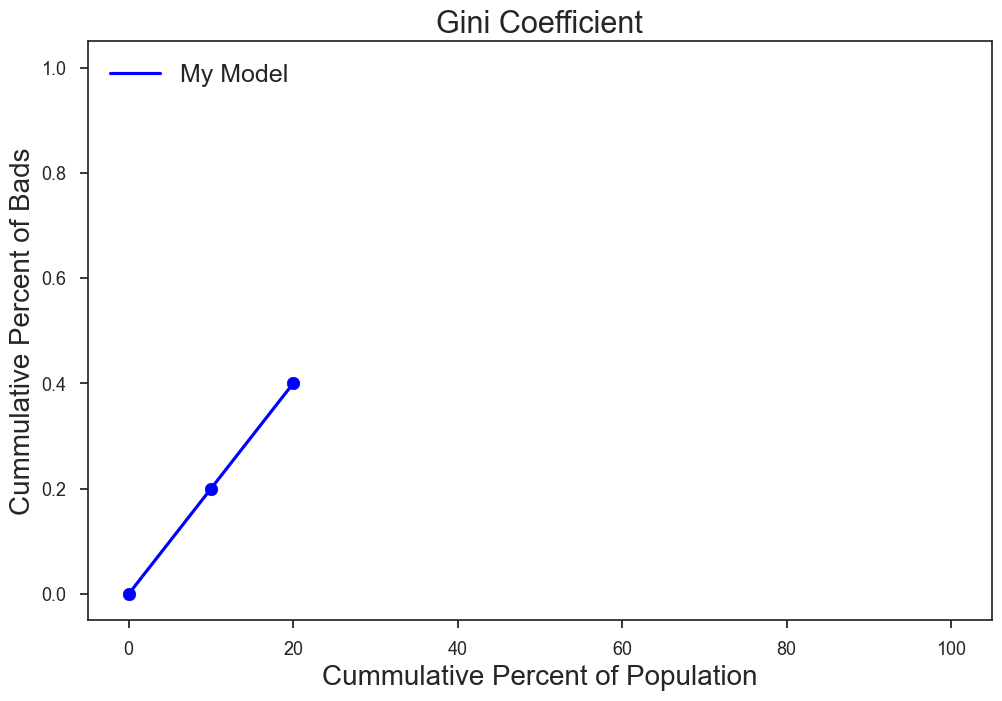

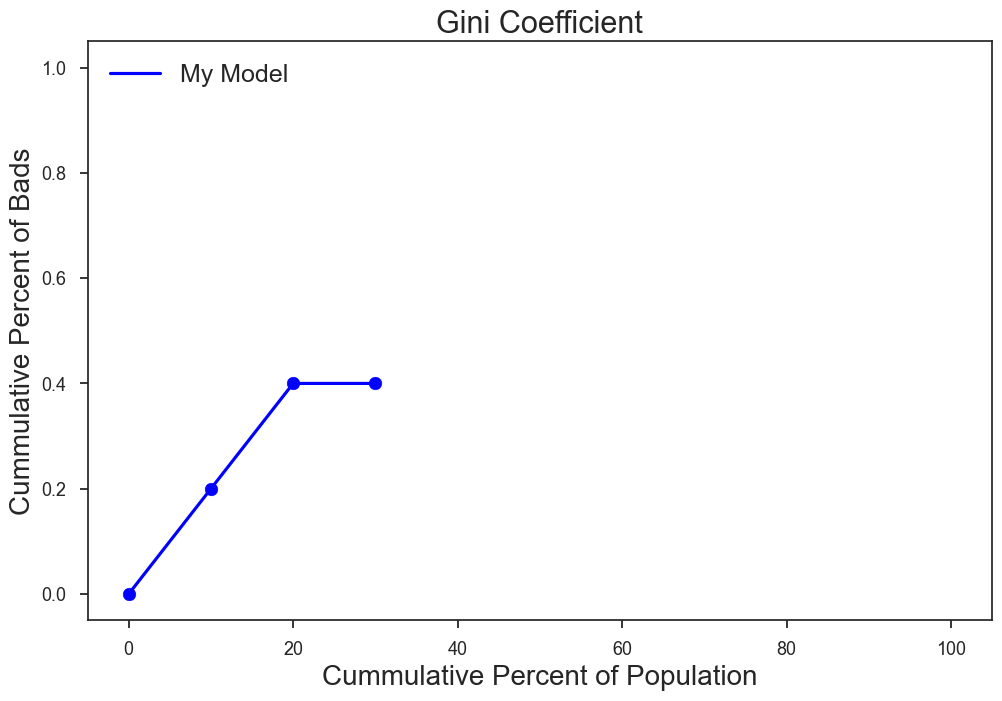

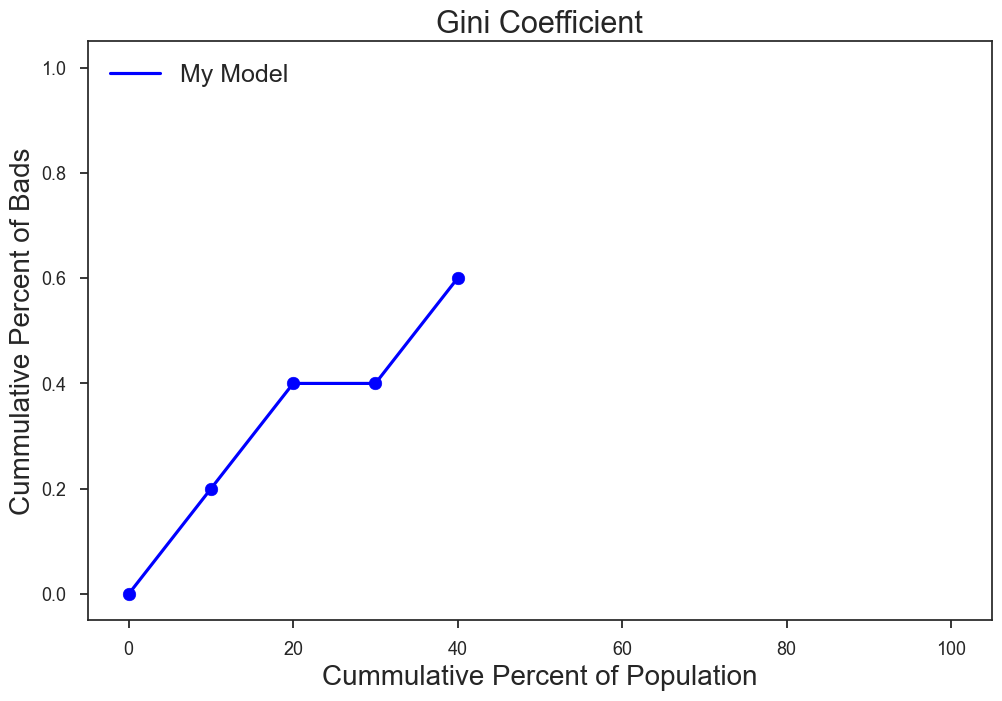

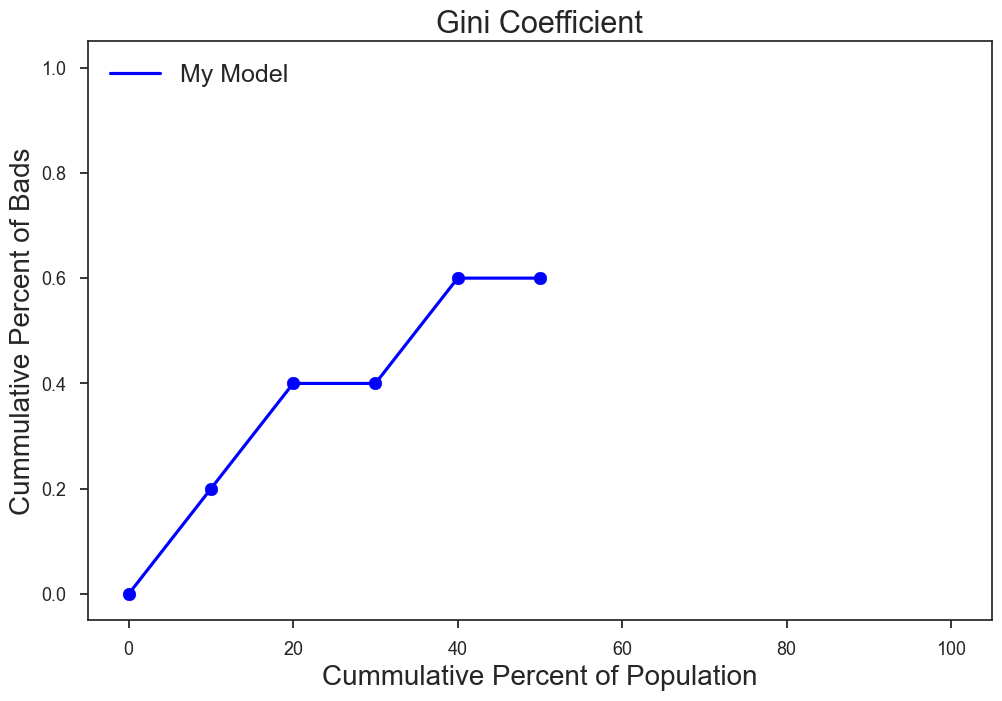

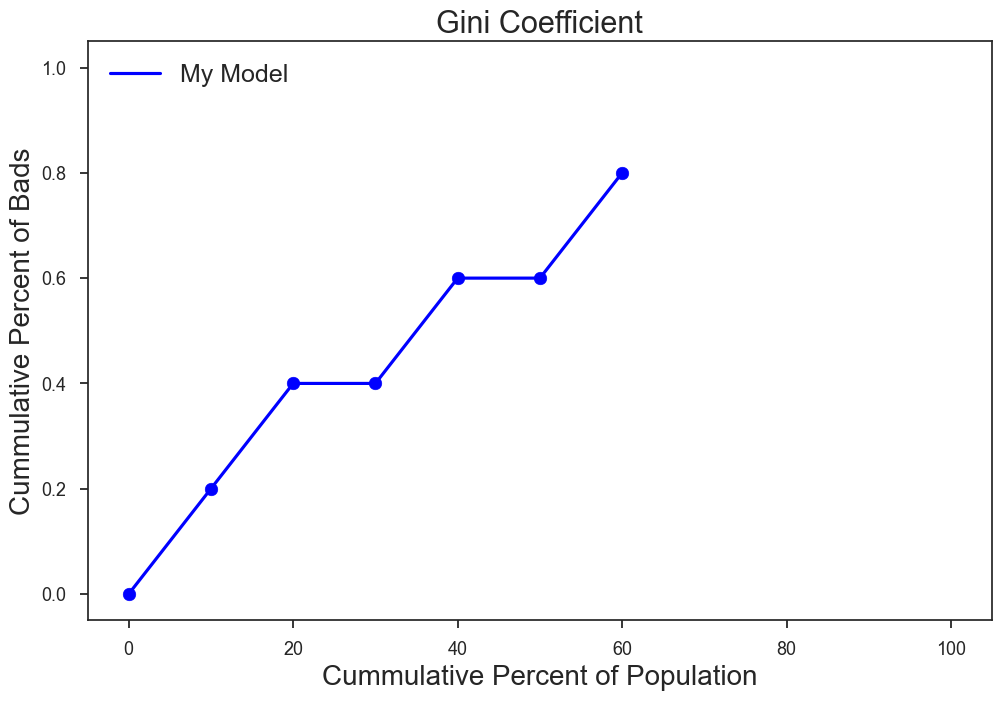

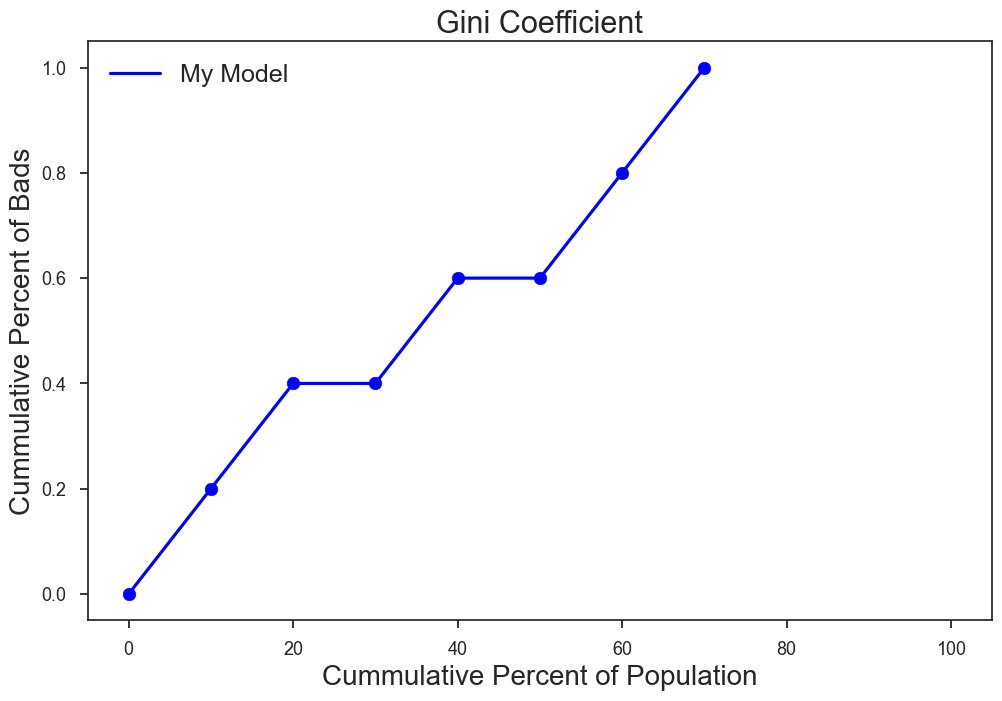

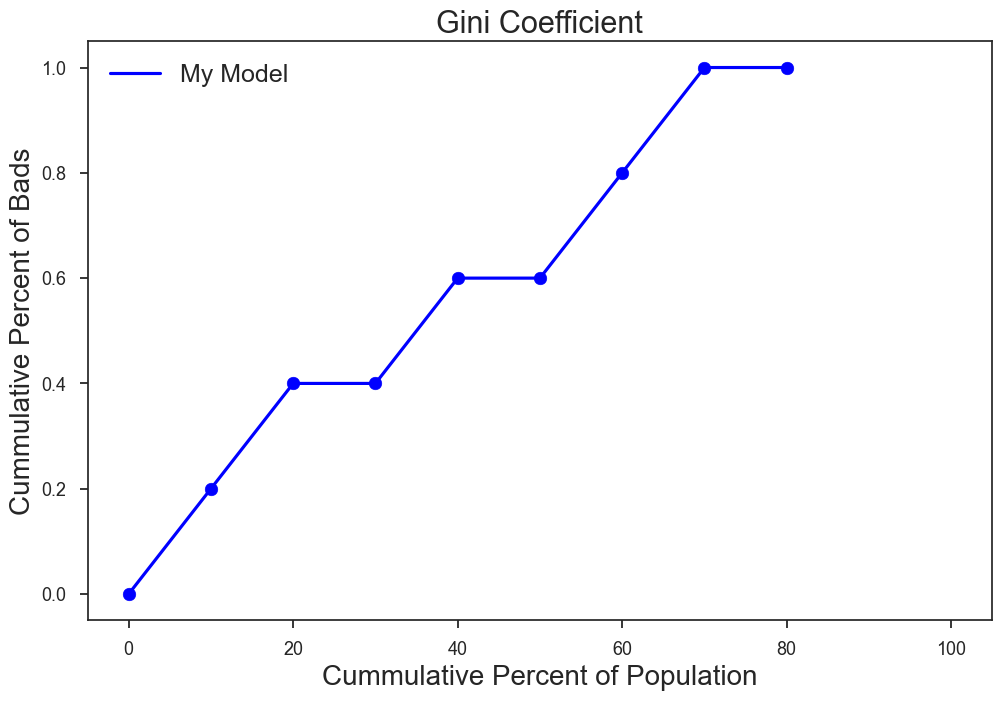

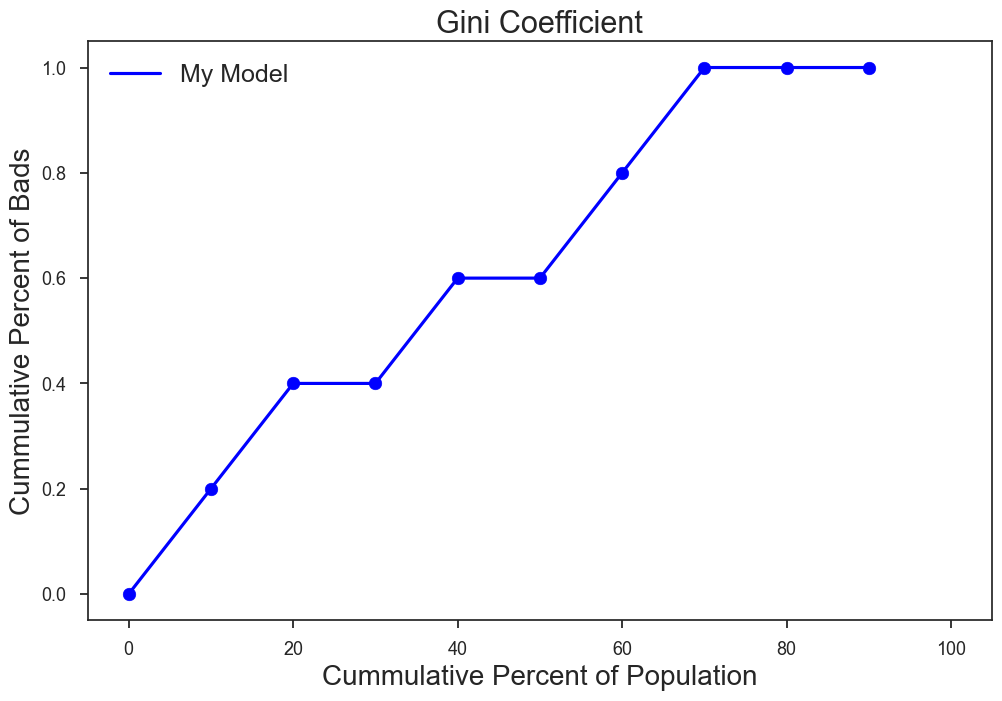

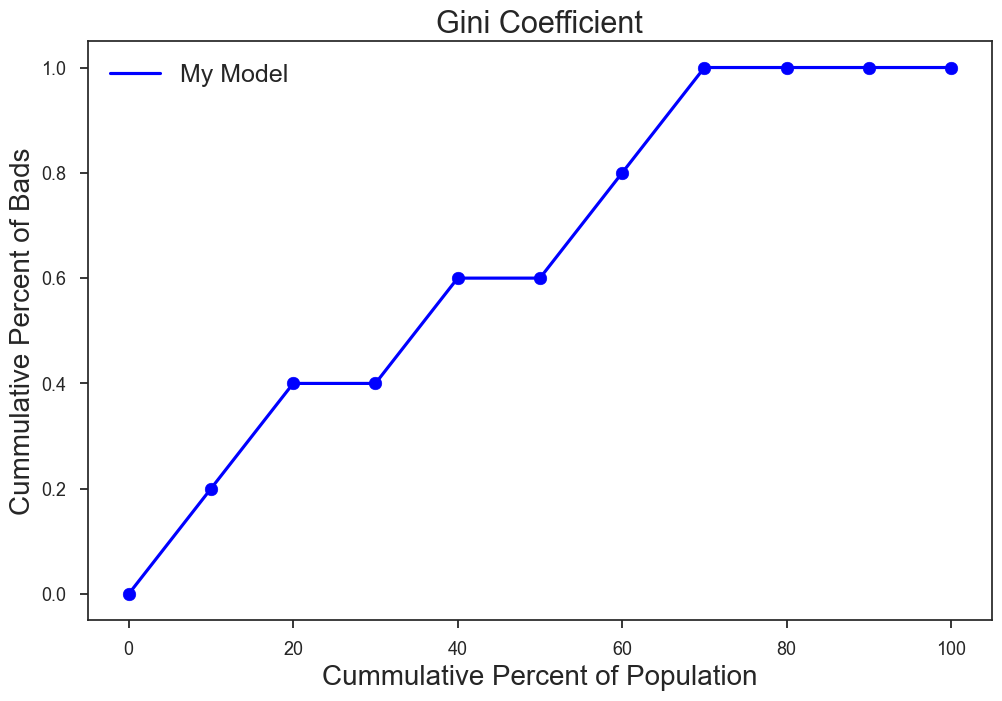

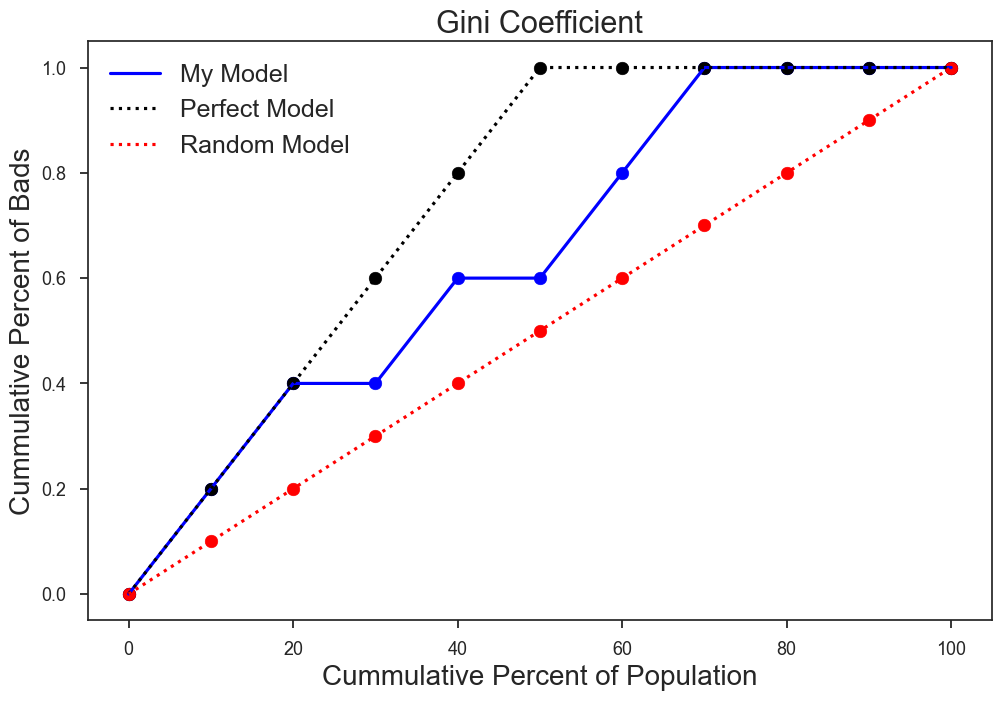

In [187]:

import matplotlib.pyplot as plt
from matplotlib import style

print(plt.style.available)
plt.style.use("seaborn-v0_8-ticks")

xs = np.linspace(0, 100, 11)

for i in range(1,len(xs)+1):
    plt.scatter(xs[:i], f_k[:i], color='blue')
    plt.plot(xs[:i], f_k[:i], label='My Model', color='blue')

    plt.xlim(- 5,105 )
    plt.ylim(-0.05,1.05)
    plt.title('Gini Coefficient', fontsize=22)
    plt.xlabel('Cummulative Percent of Population', fontsize=20)
    plt.ylabel('Cummulative Percent of Bads', fontsize=20)
    plt.legend(fontsize=18, loc=2)
    plt.savefig(f'imgs/gini/{i}_plot.png',bbox_inches='tight')
    plt.show()

plt.scatter(xs[:i], f_k[:i], color='blue')
plt.plot(xs[:i], f_k[:i], label='My Model', color='blue')
plt.scatter(xs, f_optimal, color='black')
plt.plot(xs, f_optimal, color='black', linestyle='dotted', label='Perfect Model')
plt.scatter(xs, f_rand, color='red')
plt.plot(xs, f_rand, color='red', linestyle='dotted', label='Random Model')

plt.xlim(- 5,105 )
plt.ylim(-0.05,1.05)

plt.title('Gini Coefficient', fontsize=22)
plt.xlabel('Cummulative Percent of Population', fontsize=20)
plt.ylabel('Cummulative Percent of Bads', fontsize=20)
plt.legend(fontsize=18, loc=2)
plt.savefig(f'imgs/gini/{i+1}_plot.png',bbox_inches='tight')

In [110]:
len(f_k)

11

In [127]:
np.percentile(f_k, q=)

array([0. , 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 1. , 1. , 1. , 1. ])

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])